In [1]:
# 파이토치, 토치비전, OpenCV 라이브러리 설치
# %pip install torch torchvision opencv-python

<>:6: SyntaxWarning: invalid escape sequence '\K'
<>:6: SyntaxWarning: invalid escape sequence '\K'
C:\Users\USER\AppData\Local\Temp\ipykernel_6696\3738665343.py:6: SyntaxWarning: invalid escape sequence '\K'
  img = cv2.imread('heavy\KakaoTalk_20250602_102502287_29.jpg')
Using cache found in C:\Users\USER/.cache\torch\hub\intel-isl_MiDas_master
c:\Users\USER\anaconda3\Lib\site-packages\timm\models\layers\__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Downloading: "https://github.com/isl-org/MiDaS/releases/download/v3/dpt_large_384.pt" to C:\Users\USER/.cache\torch\hub\checkpoints\dpt_large_384.pt


100%|██████████| 1.28G/1.28G [00:54<00:00, 25.4MB/s]
Using cache found in C:\Users\USER/.cache\torch\hub\intel-isl_MiDas_master


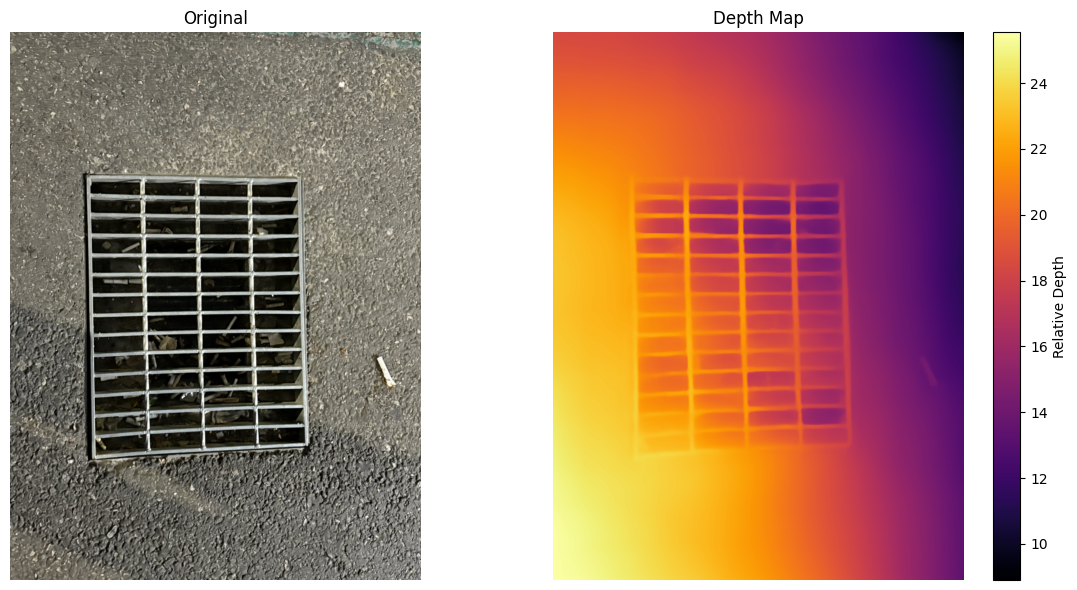

In [2]:
import cv2
import torch
import matplotlib.pyplot as plt

# 이미지 가져오기
img = cv2.imread('heavy\KakaoTalk_20250602_102502287_29.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# MiDaS 모델 가져오기
model_type = 'DPT_Large'
midas = torch.hub.load('intel-isl/MiDas', model_type)

# GPU 사용 가능하다면 GPU 사용
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
midas.to(device)
midas.eval()

# 모델 tranform 객체 가져오기
midas_transforms = torch.hub.load('intel-isl/MiDas', 'transforms')
if model_type == 'DPT_Large' or model_type == 'DPT_Hybrid' :
    transform = midas_transforms.dpt_transform
else :
    transform = midas_transforms.small_transform

# 모델 tranform
input_batch = transform(img).to(device)

with torch.no_grad() :
    # 예측
    prediction = midas(input_batch)
    # 크기 변경
    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode='bicubic',
        align_corners=False
    ).squeeze()

    # 결과
    output = prediction.cpu().numpy()

    plt.figure(figsize=(12, 6))

    # 원본
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original')
    plt.axis('off')

    # MiDaS
    plt.subplot(1, 2, 2)
    plt.imshow(output, cmap='inferno')
    plt.colorbar(label='Relative Depth')
    plt.title('Depth Map')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [3]:
# pip install timm